In [1]:
import numpy as np
import pandas as pd

import os, glob

from collections import OrderedDict

import matplotlib
import matplotlib.pyplot as plt

import ipywidgets as widgets
from traitlets import dlink
from IPython.display import display

from RIXS_functions import *

%matplotlib nbagg

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to show/hide code."></form>''')


In [3]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [4]:
######################################
# Widgets
######################################

# Folder to search images for
images_folder_widget = widgets.Text(
    value='test_images/*.h5',  
    description='Search path',
    width='500px',
)

# Display and pick which spectra to plot
select_images_widget = widgets.Select(
            options=get_all_file_names(images_folder_widget.value),
            description='Select images'
            )

display_image_button = widgets.Button(
    description='Plot',
)

x2_widget = widgets.FloatText(description='x^2', value=0.)
x1_widget = widgets.FloatText(description='x^1', value=0.)
x0_widget = widgets.FloatText(description='x^0', value=500.)

fit_curvature_button = widgets.Button(
    description='Fit',
)

In [5]:
###########################
## Widget logic
###########################
def update_select_images_widget(change):
    """Refresh images for selection"""
    select_images_widget.options = get_all_file_names(images_folder_widget.value)
    
images_folder_widget.on_submit(update_select_images_widget)

def wrap_display_image(change):
    """Load and plot images and curvature"""
    load_image(images_folder_widget.value,
               select_images_widget.value)
    plot_image(ax1, alpha=0.5, s=1)
    plot_curvature(ax1)

display_image_button.on_click(wrap_display_image)

def wrap_curvature(change):
    """Assign values in curvature widget to Images['curvature']"""
    Image['curvature'] = np.array([x2_widget.value, x1_widget.value, x0_widget.value])

x2_widget.observe(wrap_curvature)
x1_widget.observe(wrap_curvature)
x0_widget.observe(wrap_curvature)
    
def wrap_fit_curvature(change):
    """Fit the curvature and assign values into widgets"""
    curvature_values = fit_curvature()
    if curvature_values != None:
        x2_widget.value = curvature_values[0]
        x1_widget.value = curvature_values[1]
        wrap_curvature(None)
        plot_curvature(ax1)

fit_curvature_button.on_click(wrap_fit_curvature)


    

## List and choose image

In [6]:
display(images_folder_widget, select_images_widget)

## Plot image

<IPython.core.display.Javascript object>


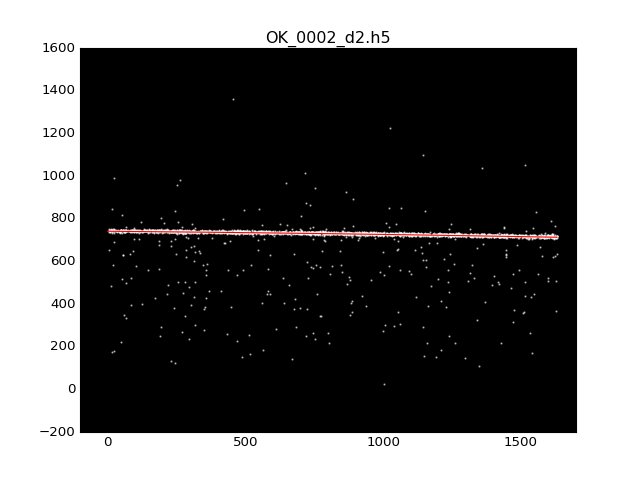

None

In [9]:
plt.figure()
ax1 = plt.subplot(111)
ax1.hold(False)

display(display(widgets.HBox((x2_widget, x1_widget, x0_widget), width='50%')),
        widgets.HBox((display_image_button, fit_curvature_button)))